## Import and Install Libraries

In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 112.8 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
Roboflow_API_KEY = userdata.get('ROBOFLOW_API_KEY')

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key=Roboflow_API_KEY)
project = rf.workspace("yc1012-ekuci").project("face-detection-odcxm")
version = project.version(10)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-Detection-10 in yolov11:: 100%|██████████| 278/278 [00:00<00:00, 4426.24it/s]


## Import Pretrained YOLO Face model

In [4]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO

model_path = hf_hub_download(repo_id="AdamCodd/YOLOv11n-face-detection", filename="model.pt")
model = YOLO(model_path)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


model.pt:   0%|          | 0.00/5.47M [00:00<?, ?B/s]

## Fine-tuning on Pretrained model

In [5]:
model.train(
    data="/content/Face-Detection-10/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    workers=8,
    lr0=0.001,                    # lower LR for fine-tuning
    freeze=10,                     # freeze backbone layers
    optimizer="Adam",               # stable fine-tuning optimizer
    project="runs/train",
    name="finetune"
)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Face-Detection-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/root/.cache/huggingface/hub/models--AdamCodd--YOLOv11n-face-detection/snapshots/ea9d9df2e9ef22ea1cf850fa860c5c0baac33ec1/model.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=finetune, n

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8844592480>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Display Result

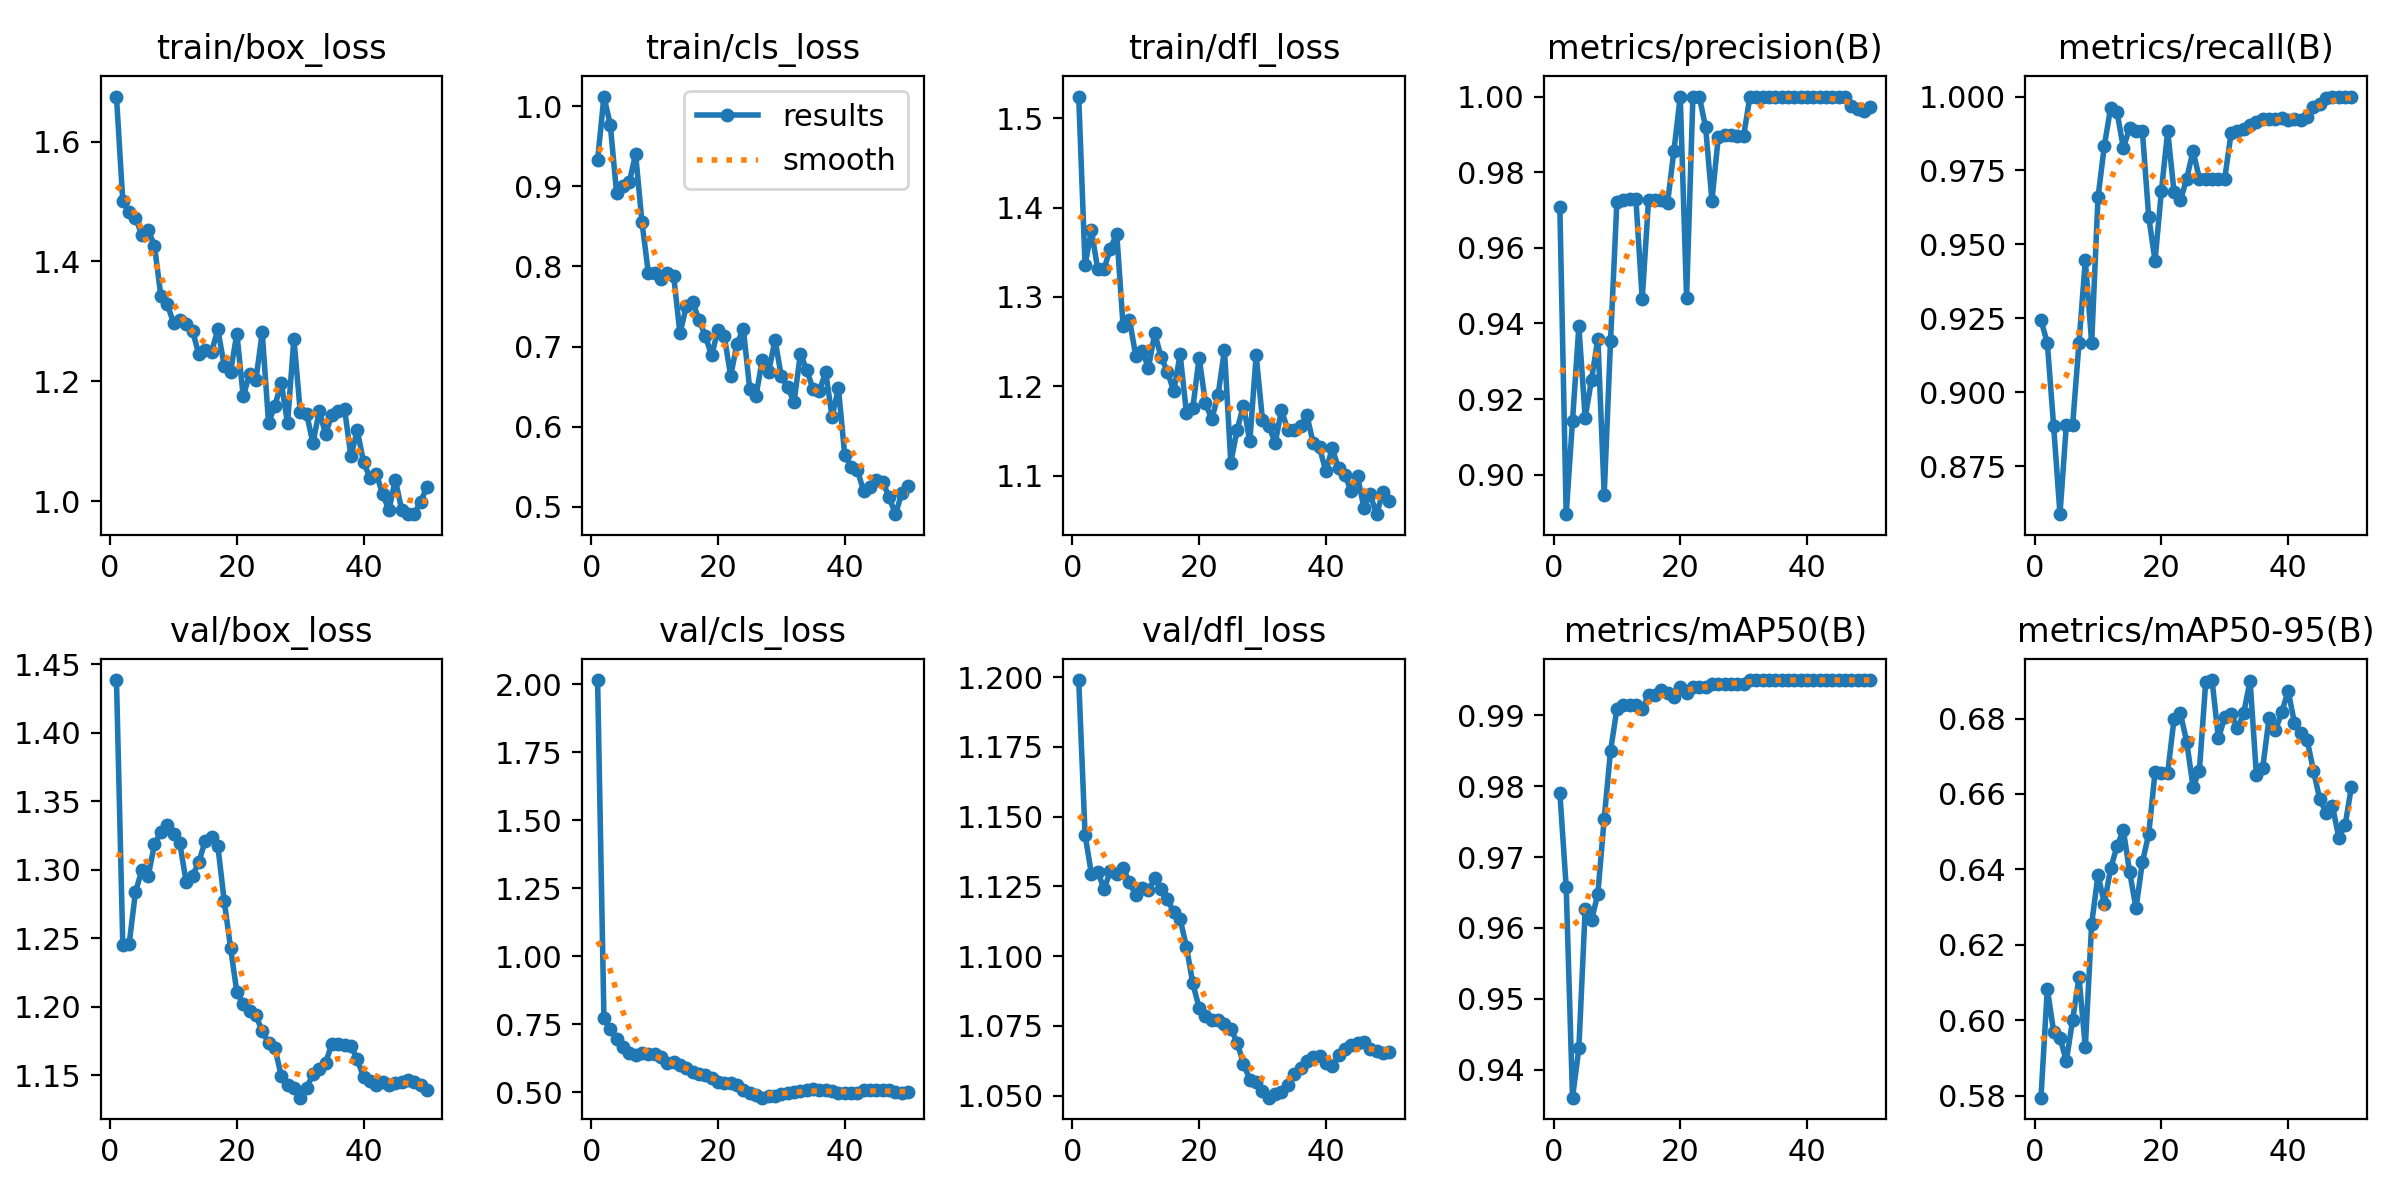

In [6]:
from IPython.display import Image
Image(filename='/content/runs/train/finetune/results.png')

## Export the model and Download the model

In [7]:
# Download the model directly to local machine
from google.colab import files
files.download('/content/runs/train/finetune/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>